In [2]:
import os
os.getcwd()

'C:\\Users\\Rajani Yadav'

In [3]:
#library
import pandas as pd

In [4]:
#import file
df = pd.read_excel('QVI_transaction_data.xlsx', engine='openpyxl')

In [5]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
#column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [8]:
df["PROD_QTY"].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [9]:
df["PROD_QTY"].max()

200

In [10]:
df["PROD_QTY"].sort_values()

89422       1
246113      1
246114      1
246115      1
246116      1
         ... 
32231       5
5160        5
150472      5
69763     200
69762     200
Name: PROD_QTY, Length: 264836, dtype: int64

In [11]:
df[df["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:
#remove outlier from prod_qyt 
df.drop(df[df["PROD_QTY"] == 200].index,inplace =True )

In [13]:
df["PROD_QTY"].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [14]:
#weight of each product
df['WGT'] = df['PROD_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


In [ ]:
#histogram for WGT


In [15]:
df["LYLTY_CARD_NBR"].value_counts()

172032    18
162039    18
230078    17
128178    17
13138     17
          ..
22190      1
22138      1
22099      1
22089      1
272380     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [19]:
df["LYLTY_CARD_NBR"].nunique()

72636

In [16]:
#count of transaction per date/#total no. of transaction of each date
new_df = df["DATE"].value_counts().reset_index()
new_df = new_df.rename(columns={'index':'DATE', 'DATE':'n_trans'})
new_df

,DATE,n_trans
0,2018-12-24,939
1,2018-12-23,917
2,2018-12-22,915
3,2018-12-19,906
4,2018-12-18,862
...,...,...
359,2018-12-12,664
360,2019-06-24,662
361,2019-06-13,659
362,2018-10-18,658


<AxesSubplot:xlabel='DATE'>

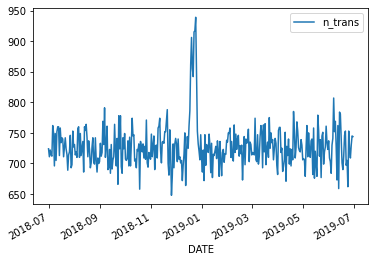

In [16]:
#maximaum no. of order
new_df.plot('DATE', 'n_trans', kind='line')

In [17]:
#null values
df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WGT               0
dtype: int64

In [17]:
#orders in the month of december
df_dec = df[df["DATE"].dt.month == 12].sort_values("DATE").reset_index(drop=True)
df_dec

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT
0,2018-12-01,220,220399,219954,91,CCs Tasty Cheese 175g,1,2.1,175
1,2018-12-01,124,124188,127929,101,Doritos Salsa Medium 300g,1,2.6,300
2,2018-12-01,108,108254,110045,74,Tostitos Splash Of Lime 175g,2,8.8,175
3,2018-12-01,128,128210,131980,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
4,2018-12-01,103,103316,103435,109,Pringles Barbeque 134g,1,3.7,134
...,...,...,...,...,...,...,...,...,...
22830,2018-12-31,180,180127,181821,8,Smiths Crinkle Cut Chips Original 170g,2,5.8,170
22831,2018-12-31,181,181014,182611,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165
22832,2018-12-31,181,181343,183992,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330
22833,2018-12-31,154,154297,154680,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150


In [ ]:
#max and min no. of orders in the month of december on which date

In [7]:
# no.orders placed on 2018-12-25(min)
df_dec = df[df["DATE"].dt.date == 2018-12-25].sort_values("DATE").reset_index(drop=True)
df_dec

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [20]:
#per day order frrequency for the month of december(max)
day_freq = df_dec['day'].value_counts().reset_index().rename(columns={'index':'day', 'day':'freq'})
day_freq

,day,freq
0,24,939
1,23,917
2,22,915
3,19,906
4,18,862
5,20,855
6,21,842
7,17,786
8,16,761
9,26,753


<AxesSubplot:xlabel='day', ylabel='freq'>

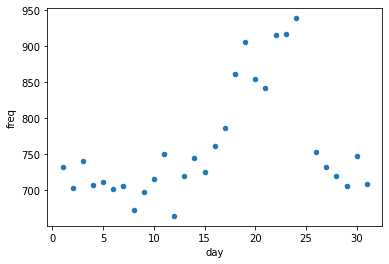

In [21]:
#visualization for the month of Dec
day_freq.plot('day', 'freq', kind='scatter')

In [22]:
df['WGT'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: WGT, dtype: int64

In [23]:
#brand names
df['BRAND_NAME'] = df['PROD_NAME'].apply(lambda x: x.split()[0])
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [24]:
#no. of orders for the particular brand
df['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

<AxesSubplot:>

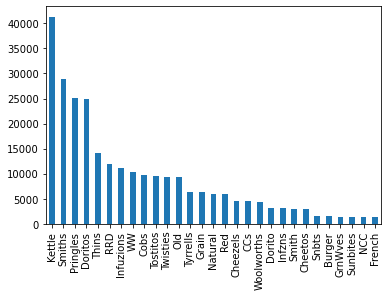

In [25]:
#graph for the orders of brands
df["BRAND_NAME"].value_counts().plot(kind= "bar")

In [26]:
df_cust = pd.read_csv('QVI_purchase_behaviour.csv')

In [27]:
df_cust

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [28]:
#merging customer data and transaction data
df1 = pd.merge(df, df_cust, on=['LYLTY_CARD_NBR'], how='left')

In [29]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [30]:
#null values
df1.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
WGT                 0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [34]:
df1['flag_chip'] = df1['PROD_NAME'].apply(lambda x: 1 if 'chips' in x.lower().split() else 0) 
df1['flag_chip']

0         0
1         0
2         1
3         0
4         0
         ..
264831    0
264832    0
264833    0
264834    0
264835    0
Name: flag_chip, Length: 264836, dtype: int64

In [121]:
#chips
df1_chip = df1[df1["flag_chip"]==1]
df1_chip

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,flag_chip
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget,1
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget,1
14,2019-05-15,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3,175,Thins,MIDAGE SINGLES/COUPLES,Budget,1
33,2019-05-18,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3,175,Thins,MIDAGE SINGLES/COUPLES,Budget,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264809,2018-08-24,271,271051,268506,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium,1
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium,1
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium,1
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium,1


<AxesSubplot:>

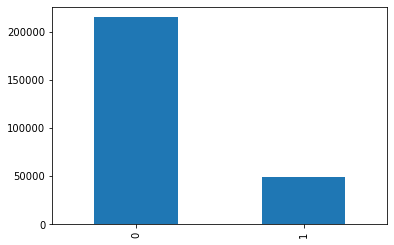

In [40]:
df1["flag_chip"].value_counts().plot(kind= "bar")

In [161]:
#no. of chips bought per customer segment/ prodqty- sum/count??
df1_count_chip = df1.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).agg(
    c_chips = pd.NamedAgg('PROD_QTY', sum)).reset_index()

In [162]:
df1_count_chip

,PREMIUM_CUSTOMER,LIFESTAGE,c_chips
0,Budget,MIDAGE SINGLES/COUPLES,9496
1,Budget,NEW FAMILIES,5571
2,Budget,OLDER FAMILIES,45065
3,Budget,OLDER SINGLES/COUPLES,35220
4,Budget,RETIREES,28764
5,Budget,YOUNG FAMILIES,37111
6,Budget,YOUNG SINGLES/COUPLES,16671
7,Mainstream,MIDAGE SINGLES/COUPLES,22699
8,Mainstream,NEW FAMILIES,4319
9,Mainstream,OLDER FAMILIES,27756


In [163]:
df1_chip.groupby("LYLTY_CARD_NBR")["PROD_QTY"].sum().max()

14

In [164]:
#customer who bought max no. of chips
df_LGP= df1_chip.groupby(["LYLTY_CARD_NBR","PREMIUM_CUSTOMER","LIFESTAGE"]).agg(
    n_chips = pd.NamedAgg('PROD_QTY', sum)).reset_index()

In [149]:
df_LGP[df_LGP['n_chips']==df_LGP['n_chips'].max()]

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,n_chips
18213,144121,Budget,OLDER FAMILIES,14
24128,191027,Mainstream,YOUNG FAMILIES,14


In [136]:
#no. of customers by segment
df1["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [135]:
#no of chips customer by segment
df1_chip["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     10268
RETIREES                   9338
OLDER FAMILIES             9097
YOUNG FAMILIES             8160
YOUNG SINGLES/COUPLES      6885
MIDAGE SINGLES/COUPLES     4733
NEW FAMILIES               1289
Name: LIFESTAGE, dtype: int64

In [103]:
#no. of customers by segment
df1["PREMIUM_CUSTOMER"].value_counts(1)

Mainstream    0.385099
Budget        0.351754
Premium       0.263148
Name: PREMIUM_CUSTOMER, dtype: float64

In [104]:
#no of chips customer by segment
df1_chip["PREMIUM_CUSTOMER"].value_counts(1)

Mainstream    0.384750
Budget        0.353365
Premium       0.261885
Name: PREMIUM_CUSTOMER, dtype: float64

In [165]:
chips_per_cust23 = df1_chip.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).agg(
    n_chips23 = pd.NamedAgg('PROD_QTY', sum),
    n_cust23 = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index() ###where flag_chip==1

In [166]:
chips_per_cust23['chips_per_cust23'] = chips_per_cust23['n_chips23']/chips_per_cust23['n_cust23']

In [156]:
chips_per_cust23

,LIFESTAGE,PREMIUM_CUSTOMER,n_chips23,n_cust23,chips_per_cust23
0,MIDAGE SINGLES/COUPLES,Budget,1849,976,1.894467
1,MIDAGE SINGLES/COUPLES,Mainstream,4304,2256,1.907801
2,MIDAGE SINGLES/COUPLES,Premium,2821,1501,1.879414
3,NEW FAMILIES,Budget,1064,569,1.869947
4,NEW FAMILIES,Mainstream,773,417,1.853717
5,NEW FAMILIES,Premium,562,303,1.854785
6,OLDER FAMILIES,Budget,8429,4335,1.944406
7,OLDER FAMILIES,Mainstream,5226,2689,1.943473
8,OLDER FAMILIES,Premium,4041,2073,1.949349
9,OLDER SINGLES/COUPLES,Budget,6628,3471,1.909536


In [170]:
###
chips_per_cust = df1.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(
    n_chips = pd.NamedAgg('PROD_QTY', sum),
    n_cust = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index()

In [171]:
chips_per_cust['chips_per_cust'] = chips_per_cust['n_chips']/chips_per_cust['n_cust']

In [172]:
chips_per_cust

,LIFESTAGE,PREMIUM_CUSTOMER,n_chips,n_cust,chips_per_cust
0,MIDAGE SINGLES/COUPLES,Budget,9496,5020,1.891633
1,MIDAGE SINGLES/COUPLES,Mainstream,22699,11874,1.911656
2,MIDAGE SINGLES/COUPLES,Premium,15526,8216,1.889727
3,NEW FAMILIES,Budget,5571,3005,1.853910
4,NEW FAMILIES,Mainstream,4319,2325,1.857634
5,NEW FAMILIES,Premium,2957,1589,1.860919
6,OLDER FAMILIES,Budget,45065,23160,1.945812
7,OLDER FAMILIES,Mainstream,27756,14244,1.948610
8,OLDER FAMILIES,Premium,22171,11192,1.980969
9,OLDER SINGLES/COUPLES,Budget,35220,18407,1.913403


In [131]:
sales_per_trans = df1_chip.groupby("TXN_ID").agg(
    s_chips = pd.NamedAgg('TOT_SALES', sum)).reset_index()

In [132]:
#recheck sales
sales_per_trans.max()

TXN_ID     270209.0
s_chips        28.5
dtype: float64

In [133]:
sales_per_trans

,TXN_ID,s_chips
0,5,1.9
1,15,2.9
2,35,5.7
3,38,3.8
4,49,3.3
...,...,...
49707,270190,8.8
49708,270197,7.6
49709,270199,11.4
49710,270207,7.6


In [134]:
df1_chip[df1_chip["TXN_ID"]==270209]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,flag_chip
25110,2019-02-17,272,272392,270209,78,Thins Chips Salt & Vinegar 175g,2,6.6,175,Thins,MIDAGE SINGLES/COUPLES,Premium,1


In [63]:
df1_chip['TXN_ID'].nunique()

49712

In [107]:
df1.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
WGT                 0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
flag_chip           0
dtype: int64

In [109]:
#Proportion of customers in each customer segment
df1.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).agg({'flag_chip':'count'}).reset_index().sort_values(by=['flag_chip'], ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,flag_chip
2,Budget,OLDER FAMILIES,23160
11,Mainstream,RETIREES,21466
13,Mainstream,YOUNG SINGLES/COUPLES,20854
5,Budget,YOUNG FAMILIES,19122
3,Budget,OLDER SINGLES/COUPLES,18407
10,Mainstream,OLDER SINGLES/COUPLES,18318
17,Premium,OLDER SINGLES/COUPLES,17754
4,Budget,RETIREES,15201
9,Mainstream,OLDER FAMILIES,14244
18,Premium,RETIREES,13096


In [173]:
#total sales by customer segment
sales_per_cust1 = df1.groupby(["LIFESTAGE" , "PREMIUM_CUSTOMER"]).agg(
    s_chips1 = pd.NamedAgg('TOT_SALES', sum),
    n_custs1 = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index()

In [174]:
sales_per_cust1

,LIFESTAGE,PREMIUM_CUSTOMER,s_chips1,n_custs1
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,5020
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,11874
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,8216
3,NEW FAMILIES,Budget,21928.45,3005
4,NEW FAMILIES,Mainstream,17013.90,2325
5,NEW FAMILIES,Premium,11491.10,1589
6,OLDER FAMILIES,Budget,168363.25,23160
7,OLDER FAMILIES,Mainstream,103445.55,14244
8,OLDER FAMILIES,Premium,81958.40,11192
9,OLDER SINGLES/COUPLES,Budget,136769.80,18407


In [175]:
sales_per_cust1['sales_per_cust1'] = sales_per_cust1['s_chips1']/sales_per_cust1['n_custs1']

In [176]:
sales_per_cust1

,LIFESTAGE,PREMIUM_CUSTOMER,s_chips1,n_custs1,sales_per_cust1
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,5020,7.074661
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,11874,7.647284
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,8216,7.112056
3,NEW FAMILIES,Budget,21928.45,3005,7.297321
4,NEW FAMILIES,Mainstream,17013.90,2325,7.317806
5,NEW FAMILIES,Premium,11491.10,1589,7.231655
6,OLDER FAMILIES,Budget,168363.25,23160,7.269570
7,OLDER FAMILIES,Mainstream,103445.55,14244,7.262395
8,OLDER FAMILIES,Premium,81958.40,11192,7.322945
9,OLDER SINGLES/COUPLES,Budget,136769.80,18407,7.430315


In [178]:
#total sales of chips by customer segment
sales_per_cust_chip = df1_chip.groupby(["LIFESTAGE" , "PREMIUM_CUSTOMER"]).agg(
    s_chips_c = pd.NamedAgg('TOT_SALES', sum),
    n_custs_c = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index()

In [179]:
sales_per_cust_chip

,LIFESTAGE,PREMIUM_CUSTOMER,s_chips_c,n_custs_c
0,MIDAGE SINGLES/COUPLES,Budget,6386.0,976
1,MIDAGE SINGLES/COUPLES,Mainstream,15804.5,2256
2,MIDAGE SINGLES/COUPLES,Premium,9732.7,1501
3,NEW FAMILIES,Budget,3805.8,569
4,NEW FAMILIES,Mainstream,2782.7,417
5,NEW FAMILIES,Premium,2018.9,303
6,OLDER FAMILIES,Budget,29390.7,4335
7,OLDER FAMILIES,Mainstream,18244.2,2689
8,OLDER FAMILIES,Premium,13874.0,2073
9,OLDER SINGLES/COUPLES,Budget,23674.7,3471


In [ ]:
#Pack size preference


In [ ]:
altitude = altitude[altitude['year'] >= pd.to_datetime('2015-01-01')]